In [205]:
import sklearn.datasets as skdata
import sklearn.model_selection as skmodel
import sklearn.neighbors as skneighbors
import sklearn.metrics as skmetrics
import sklearn.naive_bayes as skbayes
import sklearn.svm as svm
import sklearn.linear_model as sklinear
import sklearn.preprocessing as skpreprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import imblearn.over_sampling as oversampling
import imblearn.under_sampling as undersampling

pd.options.mode.chained_assignment = None

# Задание 1

In [206]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

probability = np.average([i[1] for i in data if i[0] == "дождь"])
probability

0.3333333333333333

# Задание 2

In [207]:
data : pd.DataFrame = pd.read_csv("./airlines_task.csv", delimiter=",")
data.drop(columns="id", inplace=True)
data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,XE,3036,IAH,CHS,4.0,1195,131.0,0
1,UA,315,DEN,ONT,7.0,707,145.0,0
2,OO,6673,SFO,MRY,5.0,499,42.0,1
3,WN,3668,PHX,ONT,2.0,810,70.0,1
4,AS,623,LAS,PDX,5.0,985,143.0,0
...,...,...,...,...,...,...,...,...
399995,AA,1533,ATL,DFW,3.0,415,150.0,0
399996,US,486,RNO,PHX,7.0,365,107.0,0
399997,OO,3111,CAK,MKE,7.0,640,84.0,0
399998,AA,623,BWI,DFW,1.0,1000,220.0,0


In [208]:
data.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,400000.000000,399673.000000,400000.000000,399517.000000,400000.000000
mean,2455.453042,3.953024,787.657613,131.069739,0.252202
std,2078.725805,1.845640,282.725426,69.368934,0.434277
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,710.000000,3.000000,540.000000,81.000000,0.000000
50%,1848.000000,4.000000,775.000000,115.000000,0.000000
75%,3793.250000,5.000000,1025.000000,160.000000,1.000000
max,7813.000000,7.000000,1439.000000,655.000000,1.000000


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      399264 non-null  object 
 1   Flight       400000 non-null  int64  
 2   AirportFrom  400000 non-null  object 
 3   AirportTo    398843 non-null  object 
 4   DayOfWeek    399673 non-null  float64
 5   Time         400000 non-null  int64  
 6   Length       399517 non-null  float64
 7   Delay        400000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 24.4+ MB


In [210]:
data.isnull().sum()

Airline         736
Flight            0
AirportFrom       0
AirportTo      1157
DayOfWeek       327
Time              0
Length          483
Delay             0
dtype: int64

In [211]:
data.loc[:, ["Airline", "AirportFrom", "AirportTo", "Flight"]].nunique(axis=0)

Airline          18
AirportFrom     293
AirportTo       293
Flight         6578
dtype: int64

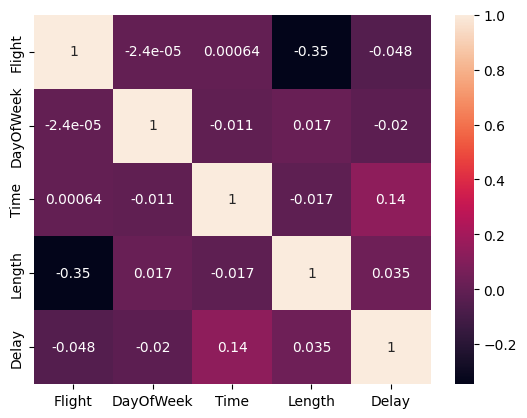

In [212]:
sea.heatmap(data.drop(["Airline", "AirportFrom", "AirportTo"], axis=1).corr(), annot=True);

In [213]:
data.dropna(inplace=True)

In [214]:
'''data.Airline.fillna("Unknown", inplace=True)
data.AirportTo.fillna("Unknown", inplace=True)
data.DayOfWeek.fillna(data.DayOfWeek.mean(axis=0), inplace=True)
data.Length.fillna(data.Length.mean(axis=0), inplace=True)''';

In [215]:
data_encoded = pd.get_dummies(data, columns=["Airline"], dtype=int).reset_index(drop=True)
routes = pd.Series(data=(data_encoded.AirportTo + data_encoded.AirportFrom), name="Route")
routes

0         CHSIAH
1         ONTDEN
2         MRYSFO
3         ONTPHX
4         PDXLAS
           ...  
397302    DFWATL
397303    PHXRNO
397304    MKECAK
397305    DFWBWI
397306    BWIFLL
Name: Route, Length: 397307, dtype: object

In [216]:
data_encoded: pd.DataFrame = pd.concat([data_encoded, routes], axis=1).drop(["AirportTo", "AirportFrom"], axis=1)

In [217]:
data_encoded.Route.isnull().value_counts()

Route
False    397307
Name: count, dtype: int64

In [218]:
data_encoded.rename({0: "Route"}, axis=1, inplace=True)

In [219]:
data_encoded.Route.value_counts()

Route
HNLOGG    862
OGGHNL    787
LAXSFO    729
SFOLAX    717
LAXSAN    715
         ... 
BKGDEN      1
DTWHPN      1
MSPPVD      1
STXCLT      1
ANCLAX      1
Name: count, Length: 4184, dtype: int64

In [220]:
label_map = dict(zip(data_encoded.Route.unique().tolist(), np.arange(0, data_encoded.Route.unique().shape[0])))
label_map

{'CHSIAH': 0,
 'ONTDEN': 1,
 'MRYSFO': 2,
 'ONTPHX': 3,
 'PDXLAS': 4,
 'SATATL': 5,
 'MSYMIA': 6,
 'EWRPVD': 7,
 'SJCBUR': 8,
 'TPACLE': 9,
 'ORDPDX': 10,
 'DTWMKE': 11,
 'SEASAN': 12,
 'MEMATL': 13,
 'DFWTUL': 14,
 'TPASJU': 15,
 'ATLBOS': 16,
 'JFKFLL': 17,
 'BROIAH': 18,
 'MIATPA': 19,
 'SLCDEN': 20,
 'ICTORD': 21,
 'LGAMKE': 22,
 'CLTDFW': 23,
 'DFWMEM': 24,
 'ANCSEA': 25,
 'ORFMCO': 26,
 'MDWMSY': 27,
 'IAHCOS': 28,
 'MSPBUF': 29,
 'LGAATL': 30,
 'MCIMDW': 31,
 'ORDMSP': 32,
 'SFOSLC': 33,
 'MKEMCO': 34,
 'SANLAX': 35,
 'HOUDEN': 36,
 'BUROAK': 37,
 'MDWBOS': 38,
 'HNLLIH': 39,
 'EWRCLT': 40,
 'CLTFLL': 41,
 'DENIAH': 42,
 'DCAEWR': 43,
 'ATLROC': 44,
 'TUSDFW': 45,
 'YUMLAX': 46,
 'SEAOAK': 47,
 'PHXSEA': 48,
 'EWRSAV': 49,
 'CHAATL': 50,
 'DTWLAS': 51,
 'LAXMSY': 52,
 'SJCLAX': 53,
 'JFKTPA': 54,
 'EVVDTW': 55,
 'CLTSYR': 56,
 'PSPSLC': 57,
 'DTWPWM': 58,
 'LAXDTW': 59,
 'SFOSEA': 60,
 'MSPPDX': 61,
 'SLCMSP': 62,
 'MKEIAH': 63,
 'PNSATL': 64,
 'SMFSNA': 65,
 'PHXPDX': 66,
 'MRY

In [221]:
data_encoded.Route

0         CHSIAH
1         ONTDEN
2         MRYSFO
3         ONTPHX
4         PDXLAS
           ...  
397302    DFWATL
397303    PHXRNO
397304    MKECAK
397305    DFWBWI
397306    BWIFLL
Name: Route, Length: 397307, dtype: object

In [222]:
data_encoded.Route = data_encoded.Route.map(lambda x: label_map.get(x))
data_encoded.Route

0            0
1            1
2            2
3            3
4            4
          ... 
397302     334
397303    1843
397304    3081
397305     530
397306    1111
Name: Route, Length: 397307, dtype: int64

In [223]:
Y = data_encoded.Delay
X = data_encoded.drop(columns=["Delay"], axis=1)
#X.Character_1 = X.Character_1.map(character_map)
#X.Character_2 = X.Character_2.map(character_map)
#characters_pairs = characters_pairs.apply(lambda x: (x.loc["Character_1"], x.loc["Character_2"]), axis=1)
#X = pd.DataFrame(data=character_pairs, columns=["Characters"], dtype=object)

In [224]:
X.shape, Y.shape

((397307, 23), (397307,))

In [225]:
X.isnull().sum()

Flight        0
DayOfWeek     0
Time          0
Length        0
Airline_9E    0
Airline_AA    0
Airline_AS    0
Airline_B6    0
Airline_CO    0
Airline_DL    0
Airline_EV    0
Airline_F9    0
Airline_FL    0
Airline_HA    0
Airline_MQ    0
Airline_OH    0
Airline_OO    0
Airline_UA    0
Airline_US    0
Airline_WN    0
Airline_XE    0
Airline_YV    0
Route         0
dtype: int64

In [226]:
X

,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,Route
0,3036,4.0,1195,131.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,315,7.0,707,145.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,6673,5.0,499,42.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,3668,2.0,810,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
4,623,5.0,985,143.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397302,1533,3.0,415,150.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,334
397303,486,7.0,365,107.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1843
397304,3111,7.0,640,84.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3081
397305,623,1.0,1000,220.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530


In [227]:
Y

0         0
1         0
2         1
3         1
4         0
         ..
397302    0
397303    0
397304    0
397305    0
397306    1
Name: Delay, Length: 397307, dtype: int64

In [228]:
pd.concat([X, Y], axis=1).to_csv("../preprocessed/classification_preprocessed.csv", index=False)
X.shape, Y.shape

((397307, 23), (397307,))

In [95]:
scaler = skpreprocessing.StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.shape, Y.shape

((397307, 23), (397307,))

In [553]:
X, Y = undersampling.EditedNearestNeighbours(n_neighbors=9, n_jobs=-1).fit_resample(X, Y)

In [554]:
X_train, X_test = skmodel.train_test_split(X, test_size=0.1, random_state=14, stratify=Y)
Y_train, Y_test = skmodel.train_test_split(Y, test_size=0.1, random_state=14, stratify=Y)

In [555]:
np.random.seed(14)
Y_train: pd.Series = Y_train
X_train: np.ndarray = X_train

classes_probabilities = Y_train.value_counts().sort_values()
major_class_count = classes_probabilities.iloc[-1]
classes_probabilities

Delay
1        25983
0        46440
Name: count, dtype: int64

In [556]:
model = sklinear.LogisticRegression().fit(X_train, Y_train)
prediction = model.predict(X_test)

neighbor_model = skneighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1, weights="distance").fit(X_train, Y_train)

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [557]:
prediction: np.ndarray = neighbor_model.predict(X_test)

In [558]:
skmetrics.accuracy_score(Y_test, prediction)

0.925686591276252

In [559]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5160
           1       0.91      0.88      0.89      2887

    accuracy                           0.93      8047
   macro avg       0.92      0.92      0.92      8047
weighted avg       0.93      0.93      0.93      8047



In [560]:
skmetrics.roc_auc_score(Y_test, prediction)

0.9160390537104315

In [561]:
bayes_model = skbayes.GaussianNB().fit(X_train, Y_train)
prediction = bayes_model.predict(X_test)

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [562]:
skmetrics.accuracy_score(Y_test, prediction)

0.7116937989312787

In [563]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74      5160
           1       0.57      0.82      0.67      2887

    accuracy                           0.71      8047
   macro avg       0.72      0.74      0.71      8047
weighted avg       0.76      0.71      0.72      8047



In [564]:
logistics_model = sklinear.LogisticRegression().fit(X_train, Y_train)
prediction = logistics_model.predict(X_test)

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [565]:
skmetrics.accuracy_score(Y_test, prediction)

0.8138436684478688

In [566]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5160
           1       0.77      0.68      0.73      2887

    accuracy                           0.81      8047
   macro avg       0.80      0.79      0.79      8047
weighted avg       0.81      0.81      0.81      8047



In [567]:
svc_model = svm.SVC(max_iter=200).fit(X_train, Y_train)
prediction = svc_model.predict(X_test)

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [568]:
skmetrics.accuracy_score(Y_test, prediction)

0.5925189511619237

In [569]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      0.90      0.74      5160
           1       0.19      0.04      0.07      2887

    accuracy                           0.59      8047
   macro avg       0.41      0.47      0.40      8047
weighted avg       0.47      0.59      0.50      8047



# Задание 3

In [375]:
from typing import Iterable, Hashable

class Metrics:
    @staticmethod
    def accuracy(Y_actual: Iterable, prediction: Iterable) -> float:
        matches = 0
        for i in zip(Y_actual, prediction, strict=True):
            if i[0] == i[1]:
                matches += 1
        return matches / len(prediction)
    
    @staticmethod
    def precision(Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        unique_values = set(Y_actual).union(set(prediction))
        results = {key: {"True": 0, "False": 0} for key in unique_values}
        for i in zip(Y_actual, prediction, strict=True):
            results[i[1]]["True"] += i[0] == i[1]
            results[i[1]]["False"] += i[0] != i[1]
        for i in results.keys():
            true_positive = results[i]["True"]
            positive = results[i]["True"] + results[i]["False"]
            if positive == 0:
                results[i] = 0.
                continue
            results[i] = round(true_positive / positive, 3)
        return results
    
    @staticmethod
    def recall(Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        unique_values = set(Y_actual).union(set(prediction))
        results = {key: {"True positive": 0, "False negative": 0} for key in unique_values}
        for i in zip(Y_actual, prediction, strict=True):
            if i[1] == i[0]:
                results[i[1]]["True positive"] += 1
            else:
                results[i[0]]["False negative"] += 1
        for i in results.keys():
            true_positive = results[i]["True positive"]
            true = results[i]["True positive"] + results[i]["False negative"]
            if true == 0:
                results[i] = 0.
                continue
            results[i] = round(true_positive / true, 3)
        return results

    @classmethod
    def f1_score(cls, Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        results = dict()
        precision = cls.precision(Y_actual, prediction)
        recall = cls.recall(Y_actual, prediction)
        for key in precision.keys():
            if precision[key] == 0 or recall[key] == 0:
                results.update({key: 0.})
                continue
            results.update({key: round(2 / (1 / precision[key] + 1 / recall[key]), 3)})
        return results
    
    @classmethod
    def metrics(cls, Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        return {"accuracy": cls.accuracy(Y_actual, prediction),
                "precision": cls.precision(Y_actual, prediction),
                "recall": cls.recall(Y_actual, prediction),
                "f1_score": cls.f1_score(Y_actual, prediction)}

In [376]:
from typing_extensions import Self

class KNearestNeighbors():
    def __init__(self, k=1) -> None:
        self.k = k
    
    def fit(self, X_train: np.ndarray, Y_train: np.ndarray) -> Self:
        Y_train = Y_train.reshape(-1, 1)
        self.table: np.ndarray = np.hstack((X_train, Y_train))
        self.classes = set(np.unique(Y_train[:, 0]))
        return self
    
    def _distance(self, x_1: np.ndarray, x_2: np.ndarray) -> np.ndarray:
        return np.linalg.norm(x_1 - x_2, axis=1).reshape(-1, 1)

    def predict(self, X: np.ndarray) -> np.ndarray:
        prediction = np.empty((X.shape[0], 1))
        for i, x_row in enumerate(X):
            distances = self._distance(self.table[:, :-1], x_row)
            neighbors_indexes = distances.argsort(axis=0)[:self.k]
            neighbors_classes = {key: 0 for key in self.classes}
            for j in neighbors_indexes:
                neighbors_classes[self.table[j[0], -1]] += 1
            result: Hashable = max(neighbors_classes.items(), key=lambda x: x[1])[0]
            prediction[i][0] = result
        return prediction

In [390]:
X_train, X_test, Y_train, Y_test = skmodel.train_test_split(X.to_numpy(), Y, test_size=0.01, stratify=Y)

model: KNearestNeighbors = KNearestNeighbors(7).fit(X_train, Y_train.to_numpy().reshape((-1, 1)))
prediction = model.predict(X_test)

print(Metrics.metrics(Y_test.to_list(), prediction.reshape((-1,))))

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [391]:
Y_train.to_numpy()

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [379]:
from typing import Optional, Union

class NaiveBayes():
    def __init__(self) -> None:
        self.classes_count: Optional[dict[Hashable, int]] = None

    def _classes_probabilities(self) -> dict[Hashable, float]: # A
        classes_probabilities: dict[Hashable, float] = dict()
        count = self.Y_train.shape[0]
        for i in self.Y_train:
            if i[0] not in classes_probabilities:
                classes_probabilities.update({i[0]: 1})
                continue
            classes_probabilities[i[0]] += 1
        self.classes_count: dict[Hashable, int] = classes_probabilities.copy()
        for key in classes_probabilities.keys():
            classes_probabilities[key] = classes_probabilities[key] / count
        return classes_probabilities
    
    def _features_likelihood(self) -> dict[Hashable, dict[Hashable, dict[Hashable, float]]]: # B | A
        predictors_probabilities: dict[Hashable, dict[Hashable, dict[Hashable, float]]] = dict()
        for i, column in enumerate(self.X_train.T):
            if i not in predictors_probabilities:
                predictors_probabilities.update({i: dict()})
            features = predictors_probabilities[i]
            for j, value in enumerate(column):
                if value not in features:
                    features.update({value: dict.fromkeys(self.classes(), 0)})
                features[value][self.Y_train[j][0]] += 1
            for class_ in features.keys():
                for key in features[class_].keys():
                    features[class_][key] = features[class_][key] / self.classes_count[key]
        return predictors_probabilities
    
    def classes(self) -> Iterable[Hashable]:
        return self.classes_count.keys()
    
    def fit(self, X_train: np.ndarray, Y_train: np.ndarray) -> Self:
        self.X_train = X_train
        self.Y_train = Y_train.reshape(-1, 1)
        self.p_classes = self._classes_probabilities()
        self.p_predictors = self._features_likelihood()
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray: # A | B
        prediction: np.ndarray = np.empty((X.shape[0], 1))
        for i, x_row in enumerate(X):
            posteriors: dict[Hashable, float] = dict.fromkeys(self.classes(), 0)
            for class_ in posteriors.keys():
                posterior = self.p_classes[class_]
                for column, value in enumerate(x_row):
                    if value not in self.p_predictors[column]:
                        posterior *= 0
                        break
                    else:
                        posterior *= self.p_predictors[column][value][class_]
                posteriors[class_] = posterior
            prediction[i][0] = max(posteriors.items(), key=lambda x: x[1])[0]
        return prediction

In [570]:
model = NaiveBayes().fit(X_train, Y_train.to_numpy())
prediction = model.predict(X_test)

print(Metrics.metrics(Y_test.to_numpy().flatten(), prediction.reshape((-1,))))

{'accuracy': 0.9021995774822915, 'precision': {0: 0.92, 1: 0.869}, 'recall': {0: 0.928, 1: 0.856}, 'f1_score': {0: 0.924, 1: 0.862}}


In [384]:
Y_test.to_numpy().flatten()

array([1, 0, 1, ..., 1, 1, 1])